In [1]:
import pandas as pd
import numpy as np
import os
import parsing as pars
import preprocessing_segmentation as pg
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
%matplotlib inline

mentari_path = '/Users/ASUS/Documents/Python Scripts/'
rizal_path = '/Users/Rizal Maulana/Downloads/semester 7/PKL/datas/'

# Parsing .txt into .feather

In [2]:
# traintypes = {'indi_apps_201904.user_id': 'object',
#               'indi_apps_201904.category_name': 'object', 
#               'indi_apps_201904.application_name': 'object',
#               'indi_apps_201904.activity_sec': 'float64',
#               'indi_apps_201904.volume_in': 'float64',
#               'indi_apps_201904.volume_out': 'float64',
#               'indi_apps_201904.ds': 'object'}

# path_in = [rizal_path+i for i in os.listdir(rizal_path) if i.endswith('.txt')]
# path_out = [i.split('.')[0]+'.feather' for i in path_in]

In [3]:
# pr = pars.Parsing(traintypes,chunksize=5000000)
# pr.text_to_feather(path_in=path_in,path_out=path_out,sep=';')

# Read data

In [4]:
list_file = [rizal_path+i for i in os.listdir(rizal_path) if i.endswith('.feather')]
list_file

['/Users/Rizal Maulana/Downloads/semester 7/PKL/datas/data_indihome_app_20190401.feather',
 '/Users/Rizal Maulana/Downloads/semester 7/PKL/datas/data_indihome_app_20190402.feather',
 '/Users/Rizal Maulana/Downloads/semester 7/PKL/datas/data_indihome_app_20190403.feather',
 '/Users/Rizal Maulana/Downloads/semester 7/PKL/datas/data_indihome_app_20190404.feather']

# Analysis data

In [22]:
segment = pg.Segmentation(limit=None)
df = pd.read_feather(list_file[0])

In [23]:
print('Users : {:,}'.format(len(np.unique(df['indi_apps_201904.user_id']))))
print('Length of unique columns application name : {:,}'.format(len(np.unique(df['indi_apps_201904.application_name']))))
print('Length of unique columns category name : {:,}'.format(len(np.unique(df['indi_apps_201904.category_name']))))

Users : 74,452
Length of unique columns application name : 8,355
Length of unique columns category name : 64


In [24]:
print('Top value by application name :')
segment.load_top(df,name='app',top_number=100)

Top value by application name :


Index(['GoogleServices', 'GooglePortalDetection', 'Facebook', 'WhatsApp',
       'AdvertisingSites', 'YouTube', 'GooglePush', 'GooglePlayServices',
       'DoubleClick', 'TelcoSites', 'TrackerSites', 'synonly', 'Instagram',
       'DeviceServicesSites', 'Oppo', 'MIUIServices', 'SoftwareDownloadsSites',
       'ProxySites', 'TouchPal', 'HostingSites', 'MiTalk', 'UZone',
       'Crashlytics', 'HTTP', 'AppsFlyer', 'GoogleSafeBrowsing', 'SSL',
       'TechnologySites', 'GoogleMaps', 'ProxyAvoidanceSites', 'Avast',
       'XiaomiMarket', 'unclassified', 'LINE', 'TelkomMercusuar', 'Akamai',
       'MessagingSites', 'InMobi', 'QQ', 'Vivo', 'CleanMaster',
       'GoogleTagManager', 'ByteDance', 'Gmail', 'GoogleInbox',
       'CheetahMobile', 'non-established', 'Shopee', 'WebApplicationSites',
       'Baidu', 'MoPub', 'SocialNewsSites', 'Adjust', 'SecuritySites', 'UCWeb',
       'WeChat', 'SamsungApps', 'CorporateSites', 'DNS', 'TikTok',
       'AccuWeather', 'GoogleContacts', 'Twitter', 'MiClo

In [25]:
print('Top value by category name :')
segment.load_top(df,name='cat')

Top value by category name :


Index(['Ads', 'DeviceServices', 'Communications', 'SocialNet', 'CDN', 'Video',
       'Games', 'GoogleServices', 'Technology', 'Web', 'Tracker', 'Net',
       'Security', 'Proxy', 'Productivity', 'ApplicationStore', 'Lifestyle',
       'Telco', 'unclassified', 'eCommerce', 'LocationServices', 'News',
       'Mail', 'SearchEngine', 'Enterprise', 'AppleServices', 'Attack',
       'WebApps', 'Media', 'CloudStorage', 'Update', 'CloudServices', 'Images',
       'Weather', 'Music', 'Finance', 'non-established', 'Backup',
       'Transportation', 'Education', 'YahooServices', 'VPN', 'FileSharing',
       'Content', 'RPC', 'Travel', 'P2P', 'File', 'Sports', 'Gov', 'Banking',
       'IPCamera', 'Religion', 'DlMgr', 'Remote', 'Automotive', 'FoodDrinks',
       'JobSearch', 'RealEstate', 'HomeDecoration', 'MDM', 'Sync', 'Misc',
       'Browser'],
      dtype='object')

# Filtering

In [9]:
list_del_cat = ['Ads','Attack','CloudStorage','Content','MDM','Misc','Proxy','Remote','Sync',
                'Tracker','Update','Weather','non-established','unclassified','Browser',
                'DeviceServices','File','FileSharing','GoogleServices','Media','RPC','Security','VPN']
list_del_app = ['GooglePortalDetection','TouchPal','CleanMaster','BBM-UCI', 'AdultSites','SinaCN']

# Preprocessing

In [10]:
print('Total datas : {}\n'.format(len(list_file)))
df_rfm = segment.RFM_preprocessing(list_file,top_number=100,filter_cat=list_del_cat,filter_app=list_del_app)

Total datas : 4

Load data 1....
Finish load data 1
Finish filtering data 1
Load data 2....
Finish load data 2
Finish filtering data 2
Load data 3....
Finish load data 3
Finish filtering data 3
Load data 4....
Finish load data 4
Finish filtering data 4


# Recency, Frequency, Monetary (RFM)

In [11]:
rfm = pd.concat(df_rfm)
date_ = dt.datetime(2019,4,5)

rfm = rfm.groupby('indi_apps_201904.user_id').agg({'indi_apps_201904.ds': lambda x: (date_ - x.max()).days,
                                                   'indi_apps_201904.category_name': lambda x: len(x),
                                                   'indi_apps_201904.activity_sec': lambda x: x.sum()})
rfm['indi_apps_201904.ds'] = rfm['indi_apps_201904.ds'].astype(int)
rfm = rfm.rename(columns={'indi_apps_201904.ds': 'R',
                          'indi_apps_201904.category_name': 'F',
                          'indi_apps_201904.activity_sec': 'M'})
rfm       

,R,F,M
indi_apps_201904.user_id,,,
0000c778c6e7ba76d9ca6bc6f0c1be,4,22,212190.0
0003421384ee5d56f95c022ac7cfcf,1,62,621210.0
0003e733807316bed457d9e8a9cbb6,1,132,940250.0
00044746c058ff491a5801f7bc05ae,1,74,572560.0
00047f913bf101c05a4234b5d08c2f,1,349,3417790.0
00068e714e4e0d2b5340e86a6f8f21,2,41,419020.0
0006e7eb392408464e4467ebf87cbd,1,163,1647610.0
0006f966f2036fdbf9f4e4cd14fbb7,1,389,2670550.0
000785f60a7663cf11bdd2a6d1bf7c,1,37,313820.0


In [12]:
for i in rfm.columns:
    print('{} : min {:,}, max {:,}'.format(i,min(rfm[i]),max(rfm[i])))
    
quan = rfm[['F','M']].quantile(q=[0.25,0.5,0.75])
quan = quan.to_dict()
quan

R : min 1, max 4
F : min 1, max 5,497
M : min 600.0, max 108,963,030.0


{'F': {0.25: 41.0, 0.5: 96.0, 0.75: 174.0},
 'M': {0.25: 294330.0, 0.5: 856770.0, 0.75: 1705670.0}}

In [13]:
def FM(nilai,dict_,kolom):
    if nilai <= dict_[kolom][0.25]:
        return 4
    elif nilai <= dict_[kolom][0.50]:
        return 3
    elif nilai <= dict_[kolom][0.75]: 
        return 2
    else:
        return 1

rfm_segment = rfm.copy().drop(columns=['F','M'])
rfm_segment['F'] = rfm['F'].apply(FM,args=(quan,'F'))
rfm_segment['M'] = rfm['M'].apply(FM,args=(quan,'M'))
rfm_segment

,R,F,M
indi_apps_201904.user_id,,,
0000c778c6e7ba76d9ca6bc6f0c1be,4,4,4
0003421384ee5d56f95c022ac7cfcf,1,3,3
0003e733807316bed457d9e8a9cbb6,1,2,2
00044746c058ff491a5801f7bc05ae,1,3,3
00047f913bf101c05a4234b5d08c2f,1,1,1
00068e714e4e0d2b5340e86a6f8f21,2,4,3
0006e7eb392408464e4467ebf87cbd,1,2,2
0006f966f2036fdbf9f4e4cd14fbb7,1,1,1
000785f60a7663cf11bdd2a6d1bf7c,1,4,3


# Optimal Cluster

In [14]:
def optimal(df,awal,akhir):
    eval_,cluster = [],[]
    for i in range(awal,akhir):
        labels = KMeans(n_clusters=i).fit_predict(df)
        s = round(silhouette_score(df, labels), 3)
        eval_.append(s)
        cluster.append(i)
        print('{} Cluster, Silhouette Score {}'.format(i,s))
        
    return eval_,cluster

# Silhouette Score

2 Cluster, Silhouette Score 0.512
3 Cluster, Silhouette Score 0.566
4 Cluster, Silhouette Score 0.552
5 Cluster, Silhouette Score 0.573
6 Cluster, Silhouette Score 0.588
7 Cluster, Silhouette Score 0.599
8 Cluster, Silhouette Score 0.643
9 Cluster, Silhouette Score 0.675


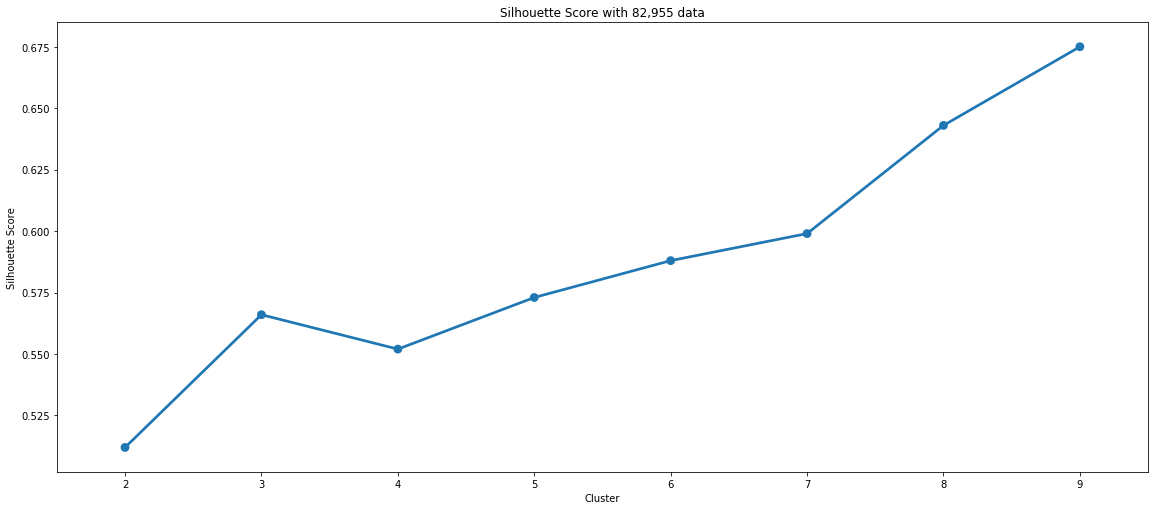

In [15]:
ss,cluster = optimal(rfm_segment,2,10)
plt.figure(figsize=(16,7))
sns.pointplot(x=cluster, y=ss)
plt.title('Silhouette Score with {:,} data'.format(len(rfm)))
plt.tight_layout()
plt.xlabel('Cluster')
plt.ylabel('Silhouette Score')
plt.show()

# Clustering

In [21]:
labels = KMeans(n_clusters=5).fit_predict(rfm_segment)
rfm_s = rfm_segment.copy()
rfm_s['Segment'] = labels

rfm_group = rfm_s.groupby('Segment')
rfm_group.get_group(4)

,R,F,M,Segment
indi_apps_201904.user_id,,,,
0003421384ee5d56f95c022ac7cfcf,1,3,3,4
00044746c058ff491a5801f7bc05ae,1,3,3,4
00068e714e4e0d2b5340e86a6f8f21,2,4,3,4
000785f60a7663cf11bdd2a6d1bf7c,1,4,3,4
000a4dbec9c3ff64299e2be9378eed,1,3,4,4
000f074cf46fff0a01d269a4a39217,1,3,3,4
000f0ff2e3f25bb1af13a8b46ba5ec,1,3,3,4
0013c525158c25bae140970f210598,1,4,4,4
0016a7bc5aef20a82b06ed66eca6c7,1,4,4,4


# Documentations